# Step 1_Feature_selection

# CONTENT

    1. Import Libraries
    2. Load data
    3. Explore data
    4. Create new variables
    5. Feature selection(target: Recidiva Local)
    6. Preprocesing data: Encoding features and null values
    7. Statistics and visualisation
    8. Correlation between variables
    9. Imbalanced data
    10. Save final dataframe

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Encoding categorical data
from sklearn.preprocessing import LabelEncoder

#show cells with width as long as screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load data

In [2]:
df_original= pd.read_excel("Base Hígado SPSS 2019 por lesiones anonimizado.xlsx", engine='openpyxl')
pd.options.display.max_columns = None # para observar todas las columnas
pd.options.display.max_rows = None # para observar todas las columnas

In [3]:
df_original.head()

,Sexo,NHC,NumLesiones,Edad,Grupos_Edad,Histología,AdenoCaSiNo,NeumotoraxHematoma,FechDco,MesesDesdeDcoDeMets,numeroQtPrevias,TtoLocalPrevio,mtsSNC,mtdOtrosNiveles,VolPTV,TamañoGTV,BED100Gy,BEDSolo2opciones,Dt,Df,NF,ISOenPTV,DistanciaX,DistanciaY,DistanciaZ,Vector,Longitud_Visicoil,mayor95,Cubrimientomayor95,mayor107,mayor110,DMax,DMaxBED,Dmedia,DMediaBED,Dmin,DMinBED,VolHigSano,inicioTto,ControlRespiratorio,DistanciaMarcador,Segmento,ToxAguda,GradoTox,FUltRev,EstadoUltRev,FechaProgreSiOtra,ReciLocal,PruebasClaveUlt,MetUltRev,MTS_TRES_Opciones,FechaMts,ToxicidadCrónica,GradoToxCronica,CausaExitus,SupervivSiNo,FechaExitusSiOtra,PerdidoSegu,Notas,TiempoControl_Local,TiempoLibre_Enfermedad,TiempoSuperv_SBRT,TiempoSuperv_Dco,Tiempo_Dco_a_MTS,Sincrono_Metacrono
0,M,1,2 Lesiones,64,50-70,NSCLC,Otras Histologías,No,2010-04-14,2011-12-22,1 linea,No,No,No,34.4,1.50,Mayor100Gy,Mayor 100Gy,60.0,20.0,3,Si,47.0,37.0,4.0,60.0,29.0,99.5,>95%,1.2,0.0,64.72,204.342613,NaN,NaN,54.08,NaN,1405.0,2012-03-07,Gating,NaN,Segemnto VII,No,NaN,2013-02-26,Complete Response,2013-02-26,No,TAC,Mts óseas,MTS Otras Localizaciones,2012-08-01,No,NaN,Causa intercurrente,No,2013-03-04,NaN,Muere por neumonia aunque en progresion tumoral,11.0,4.0,11.0,34.0,20.0,Metacronas
1,M,1,2 Lesiones,64,50-70,NSCLC,Otras Histologías,No,2010-04-14,2011-12-22,1 linea,No,No,No,44.3,5.30,Mayor100Gy,Mayor 100Gy,60.0,20.0,3,NaN,28.0,4.0,19.0,34.0,31.0,99.8,>95%,6.6,0.0,64.60,203.705333,NaN,NaN,62.70,NaN,1405.0,2012-11-13,Gating,NaN,Segmento V,No,NaN,2013-02-26,Complete Response,2013-02-26,No,TAC,Mts óseas,MTS Otras Localizaciones,2013-08-01,No,NaN,Causa intercurrente,No,2013-02-26,NaN,NaN,3.0,8.0,3.0,34.0,20.0,Metacronas
2,M,2,2 Lesiones,71,>70,Adenoca Colon/Rectal,Adenocarcinoma Colorrectal,No,2002-11-01,2004-03-15,mas de dos líneas,No,No,No,100.0,5.59,Mayor100Gy,Mayor 100Gy,45.0,15.0,3,NaN,30.0,36.0,6.0,47.0,18.0,99.0,>95%,1.0,37.0,52.90,146.180333,NaN,NaN,38.60,NaN,1273.0,2010-03-18,Gating,NaN,Segmento IV,No,NaN,2011-02-14,Partial Response,2011-02-14,No,NaN,Pulmon,MTS Otras Localizaciones,2011-02-15,No,NaN,Tumor,No,2011-03-10,NaN,NaN,10.0,10.0,11.0,100.0,16.0,Metacronas
3,M,2,2 Lesiones,71,>70,Adenoca Colon/Rectal,Adenocarcinoma Colorrectal,No,2002-11-01,2004-03-15,mas de dos líneas,No,No,No,109.0,8.60,Mayor100Gy,Mayor 100Gy,48.0,16.0,3,NaN,55.0,5.0,6.0,55.0,16.0,94.0,<95%,40.0,9.0,55.60,158.645333,NaN,NaN,39.60,NaN,1171.0,2010-05-04,Gating,NaN,Segmento IV,No,NaN,2011-02-14,Partial Response,2011-02-14,No,NaN,Pulmon,MTS Otras Localizaciones,2011-02-15,No,NaN,Tumor,No,2011-03-10,NaN,NaN,9.0,9.0,10.0,100.0,16.0,Metacronas
4,M,3,2 Lesiones,74,>70,Adenoca Colon/Rectal,Adenocarcinoma Colorrectal,No,2006-11-15,2006-11-15,dos lineas,No,No,No,9.8,1.90,Menor100Gy,Menor o Igual 100Gy,36.0,12.0,3,NaN,0.0,NaN,NaN,NaN,NaN,100.0,>95%,30.0,0.0,39.20,90.421333,NaN,NaN,33.90,NaN,1538.8,2008-07-09,Gating,NaN,Segmento VI,No,NaN,2012-03-04,Local Progression,2011-04-15,Si,PET-TAC,Nueva met órgano tratado,MTS Higado,2011-12-15,No,NaN,Tumor,No,2012-03-04,NaN,Las dos lesiones progresadas se trataron con R...,33.0,41.0,43.0,63.0,0.0,Sincronas


# 3. Explore data

In [4]:
data= df_original.copy()
data.shape

(414, 65)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Sexo                    414 non-null    object        
 1   NHC                     414 non-null    int64         
 2   NumLesiones             414 non-null    object        
 3   Edad                    414 non-null    int64         
 4   Grupos_Edad             413 non-null    object        
 5   Histología              414 non-null    object        
 6   AdenoCaSiNo             414 non-null    object        
 7   NeumotoraxHematoma      414 non-null    object        
 8   FechDco                 413 non-null    datetime64[ns]
 9   MesesDesdeDcoDeMets     414 non-null    datetime64[ns]
 10  numeroQtPrevias         413 non-null    object        
 11  TtoLocalPrevio          414 non-null    object        
 12  mtsSNC                  414 non-null    object    

In [6]:
#all columns name
df_original.columns

Index(['Sexo', 'NHC', 'NumLesiones', 'Edad', 'Grupos_Edad', 'Histología',
       'AdenoCaSiNo', 'NeumotoraxHematoma', 'FechDco', 'MesesDesdeDcoDeMets',
       'numeroQtPrevias', 'TtoLocalPrevio', 'mtsSNC', 'mtdOtrosNiveles',
       'VolPTV', 'TamañoGTV', 'BED100Gy', 'BEDSolo2opciones', 'Dt', 'Df', 'NF',
       'ISOenPTV', 'DistanciaX', 'DistanciaY', 'DistanciaZ', 'Vector',
       'Longitud_Visicoil', 'mayor95', 'Cubrimientomayor95', 'mayor107',
       'mayor110', 'DMax', 'DMaxBED', 'Dmedia', 'DMediaBED', 'Dmin', 'DMinBED',
       'VolHigSano', 'inicioTto', 'ControlRespiratorio', 'DistanciaMarcador',
       'Segmento', 'ToxAguda', 'GradoTox', 'FUltRev', 'EstadoUltRev',
       'FechaProgreSiOtra', 'ReciLocal', 'PruebasClaveUlt', 'MetUltRev',
       'MTS_TRES_Opciones', 'FechaMts', 'ToxicidadCrónica', 'GradoToxCronica',
       'CausaExitus', 'SupervivSiNo', 'FechaExitusSiOtra', 'PerdidoSegu',
       'Notas', 'TiempoControl_Local', 'TiempoLibre_Enfermedad',
       'TiempoSuperv_SBRT', 'Tie

# 4. Create new variables

We order by date in order to be able to make subsequent calculations of treatment times.

In [7]:
data = data.sort_values(['NHC','inicioTto'])

**1. Number of total lesions treated**

We want to know the number of times each patient appears to know how many treatments she/he has received

In [8]:
num_lesiones = data.NHC.value_counts().reset_index()
num_lesiones.rename(columns = {'index': 'NHC', 'NHC':'Num_lesion_total'},inplace = True)
data = data.merge(num_lesiones, on = 'NHC' )

**2. Treatments treated at the same time**

For that part, we create a small dataframe with the columns we need to be able to work in a simpler way

In [9]:
df_part = data[['NHC', 'NumLesiones', 'inicioTto']].sort_values(['NHC','inicioTto'])

In [10]:
tratamientos_vez = df_part.groupby(['NHC','inicioTto']).count().reset_index()
tratamientos_vez.rename(columns = {'NumLesiones': 'tratamientos_vez'},inplace = True)
data = data.merge(tratamientos_vez, on = ['NHC', 'inicioTto'])

**3. Have been treated before?**

Add column with Yes or No if patients have been previously treated, i.e., if there are different dates of treatments or not.

In [11]:
min_date = df_part.groupby('NHC')['inicioTto'].min().reset_index()
min_date.rename(columns = {'inicioTto': 'min_date'},inplace = True)
tratatos_anteriomente = min_date.merge(df_part, on = ['NHC'])
tratatos_anteriomente['tratatos_anteriomente'] = np.where(tratatos_anteriomente['min_date'] == tratatos_anteriomente['inicioTto'], 'No', 'Sí')
del tratatos_anteriomente['min_date']
data= data.merge(tratatos_anteriomente, on = ['NHC','NumLesiones', 'inicioTto']).drop_duplicates()

**4. How long does it takes from primary diagnostic to Metastasis diagnostic?**

In [12]:
data['Mts-dco'] = (data['MesesDesdeDcoDeMets'] - data['FechDco']).dt.days

**5. How long does it takes from Metastasis diagnostic to treatment begins?**

In [13]:
data['Mts-tto'] = (data['inicioTto'] - data['MesesDesdeDcoDeMets']).dt.days

**6. Calculate BED max and BED min**

After discussion with experts, it was decided that the most defining characteristic of the treatment was the maximum/minimum equivalent biological dose rather than the maximum/minimum dose used.

BED = Dmax*((d/f)/ (alpha/beta))

In [14]:
data['BEDmax_test']= data.DMax*(1 + ((data.DMax/data.NF)/10))

In [15]:
data['BEDmim_test']= data.Dmin*(1 + ((data.Dmin/data.NF)/10))

# 5. Feature selection (target: Recidiva local)

In [16]:
data.columns

Index(['Sexo', 'NHC', 'NumLesiones', 'Edad', 'Grupos_Edad', 'Histología',
       'AdenoCaSiNo', 'NeumotoraxHematoma', 'FechDco', 'MesesDesdeDcoDeMets',
       'numeroQtPrevias', 'TtoLocalPrevio', 'mtsSNC', 'mtdOtrosNiveles',
       'VolPTV', 'TamañoGTV', 'BED100Gy', 'BEDSolo2opciones', 'Dt', 'Df', 'NF',
       'ISOenPTV', 'DistanciaX', 'DistanciaY', 'DistanciaZ', 'Vector',
       'Longitud_Visicoil', 'mayor95', 'Cubrimientomayor95', 'mayor107',
       'mayor110', 'DMax', 'DMaxBED', 'Dmedia', 'DMediaBED', 'Dmin', 'DMinBED',
       'VolHigSano', 'inicioTto', 'ControlRespiratorio', 'DistanciaMarcador',
       'Segmento', 'ToxAguda', 'GradoTox', 'FUltRev', 'EstadoUltRev',
       'FechaProgreSiOtra', 'ReciLocal', 'PruebasClaveUlt', 'MetUltRev',
       'MTS_TRES_Opciones', 'FechaMts', 'ToxicidadCrónica', 'GradoToxCronica',
       'CausaExitus', 'SupervivSiNo', 'FechaExitusSiOtra', 'PerdidoSegu',
       'Notas', 'TiempoControl_Local', 'TiempoLibre_Enfermedad',
       'TiempoSuperv_SBRT', 'Tie

In [17]:
data_Recidiva = data[['Sexo', 'Edad','Num_lesion_total', 'tratamientos_vez', 'tratatos_anteriomente', \
               'Mts-tto', 'Mts-dco','Histología', 'NeumotoraxHematoma', 'numeroQtPrevias', 'TtoLocalPrevio', 'mtsSNC', 'mtdOtrosNiveles', \
              'VolPTV', 'BEDmax_test','BEDmim_test', 'VolHigSano', 'ControlRespiratorio','Segmento', 'GradoTox', 'ReciLocal' ]]

### Explore recidiva local

In [18]:
data_Recidiva.shape

(414, 21)

In [19]:
data_Recidiva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 1071
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sexo                   414 non-null    object 
 1   Edad                   414 non-null    int64  
 2   Num_lesion_total       414 non-null    int64  
 3   tratamientos_vez       414 non-null    int64  
 4   tratatos_anteriomente  414 non-null    object 
 5   Mts-tto                414 non-null    int64  
 6   Mts-dco                413 non-null    float64
 7   Histología             414 non-null    object 
 8   NeumotoraxHematoma     414 non-null    object 
 9   numeroQtPrevias        413 non-null    object 
 10  TtoLocalPrevio         414 non-null    object 
 11  mtsSNC                 414 non-null    object 
 12  mtdOtrosNiveles        414 non-null    object 
 13  VolPTV                 414 non-null    float64
 14  BEDmax_test            412 non-null    float64
 15  BEDmi

In [20]:
data_Recidiva.isnull().sum()

Sexo                       0
Edad                       0
Num_lesion_total           0
tratamientos_vez           0
tratatos_anteriomente      0
Mts-tto                    0
Mts-dco                    1
Histología                 0
NeumotoraxHematoma         0
numeroQtPrevias            1
TtoLocalPrevio             0
mtsSNC                     0
mtdOtrosNiveles            0
VolPTV                     0
BEDmax_test                2
BEDmim_test                3
VolHigSano                 2
ControlRespiratorio        0
Segmento                   0
GradoTox                 310
ReciLocal                  2
dtype: int64

# 6. Preprocesing data: Encoding features and null values

Before removing null values we fill toxicity variable because null values correspond with No toxicity.

**1. Toxicity** 

In [21]:
data_Recidiva['GradoTox'] = data_Recidiva['GradoTox'].fillna('No')

In [22]:
data_Recidiva['GradoTox'] = data_Recidiva['GradoTox'].map({'No': 0, 'I': 1, 'II': 2, 'III': 3, 'IV': 4})

**For our first approximation we will eliminate null values because there are not many of them.**

In [23]:
data_Recidiva.isnull().sum()

Sexo                     0
Edad                     0
Num_lesion_total         0
tratamientos_vez         0
tratatos_anteriomente    0
Mts-tto                  0
Mts-dco                  1
Histología               0
NeumotoraxHematoma       0
numeroQtPrevias          1
TtoLocalPrevio           0
mtsSNC                   0
mtdOtrosNiveles          0
VolPTV                   0
BEDmax_test              2
BEDmim_test              3
VolHigSano               2
ControlRespiratorio      0
Segmento                 0
GradoTox                 0
ReciLocal                2
dtype: int64

In [24]:
data_Recidiva = data_Recidiva.dropna()

In [25]:
data_Recidiva.isnull().sum()

Sexo                     0
Edad                     0
Num_lesion_total         0
tratamientos_vez         0
tratatos_anteriomente    0
Mts-tto                  0
Mts-dco                  0
Histología               0
NeumotoraxHematoma       0
numeroQtPrevias          0
TtoLocalPrevio           0
mtsSNC                   0
mtdOtrosNiveles          0
VolPTV                   0
BEDmax_test              0
BEDmim_test              0
VolHigSano               0
ControlRespiratorio      0
Segmento                 0
GradoTox                 0
ReciLocal                0
dtype: int64

**2. Target: Recidiva local**

In [26]:
target_encoder = LabelEncoder()
data_Recidiva['ReciLocal']= target_encoder.fit_transform(data_Recidiva['ReciLocal'])

In [27]:
target_encoder.classes_

array(['No', 'Si'], dtype=object)

**- No Recidiva: 0**

**- Si Recidiva: 1**

**3. Number of previous chemotherapies**

In [28]:
data_Recidiva.numeroQtPrevias.unique()

array(['1 linea', 'mas de dos líneas', 'dos lineas', 'no QT'],
      dtype=object)

In [29]:
# we can quantify this categorical variable to a numeric
data_Recidiva['numeroQtPrevias'] = data_Recidiva['numeroQtPrevias'].map({'no QT': 0, '1 linea': 1, 'dos lineas': 2, 'mas de dos líneas': 3})

# 7. Exploratory Data Analysis (EDA): Statistics and visualisation

In [30]:
pd.set_option('precision',3)
data_Recidiva.describe()

,Edad,Num_lesion_total,tratamientos_vez,Mts-tto,Mts-dco,numeroQtPrevias,VolPTV,BEDmax_test,BEDmim_test,VolHigSano,GradoTox,ReciLocal
count,407.000,407.000,407.000,407.000,407.000,407.000,407.000,407.000,407.000,407.000,407.000,407.000
mean,63.381,5.251,2.612,591.479,356.170,1.538,40.197,147.405,109.898,1431.285,0.371,0.160
std,12.188,3.916,1.836,712.796,575.454,0.906,71.115,37.753,34.731,363.808,0.724,0.367
min,28.000,1.000,1.000,-1088.000,0.000,0.000,2.400,48.533,15.732,747.000,0.000,0.000
25%,55.000,2.000,1.000,208.000,0.000,1.000,9.195,122.157,92.054,1200.000,0.000,0.000
50%,64.000,4.000,2.000,484.000,53.000,1.000,18.910,139.244,104.633,1384.480,0.000,0.000
75%,73.000,8.000,4.000,749.500,500.000,2.000,41.510,166.332,130.344,1604.500,1.000,0.000
max,88.000,14.000,8.000,6862.000,3287.000,3.000,838.690,256.533,193.743,3307.280,4.000,1.000


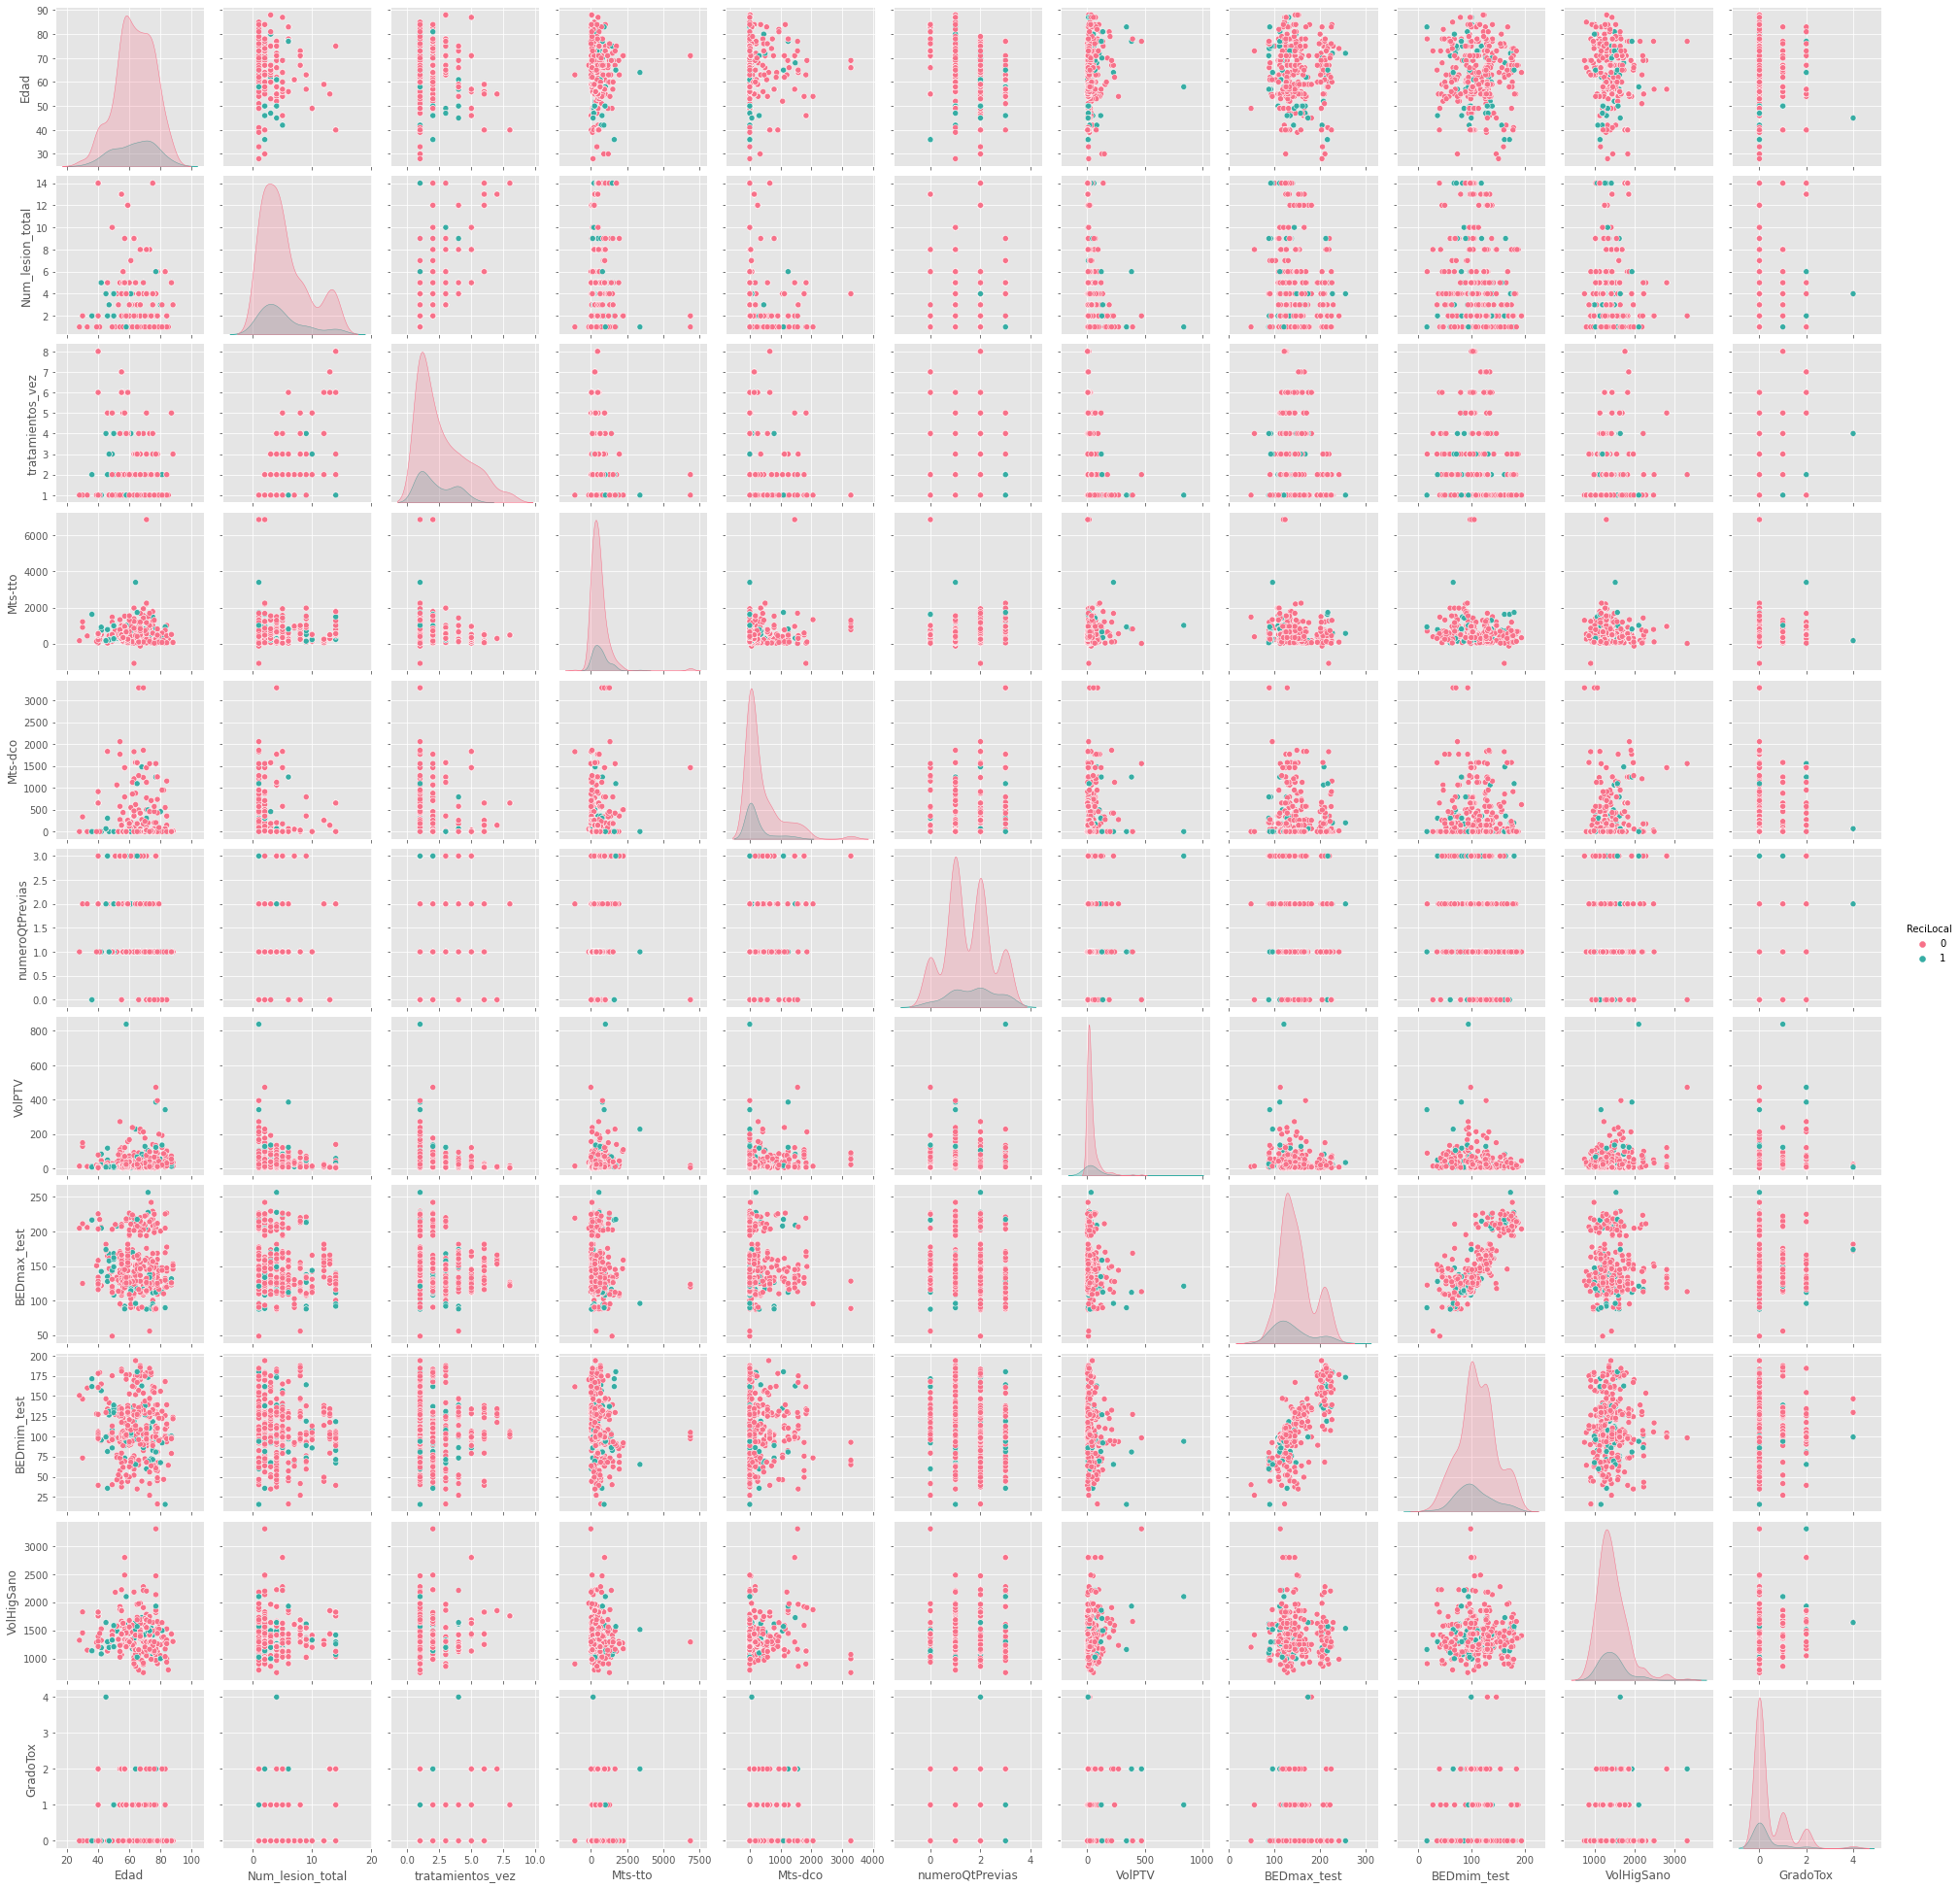

In [31]:
sns.pairplot(data_Recidiva, hue="ReciLocal", palette="husl");

At first we do not see any relationship between the variables. However, we can observe that:
- All patients with toxicity grade 4, present local recurrence. It should be noted that toxicity is linked to previous chemotherapy treatment.
- All patients who have had more than 5 lesions treated at the same time do not present local recurrence. Therefore, we can say that if the patient has 5 or more lesions it is better to treat them all at the same time.
-We can also see a class imbalance as there are more pink samples than green ones.

Histograms

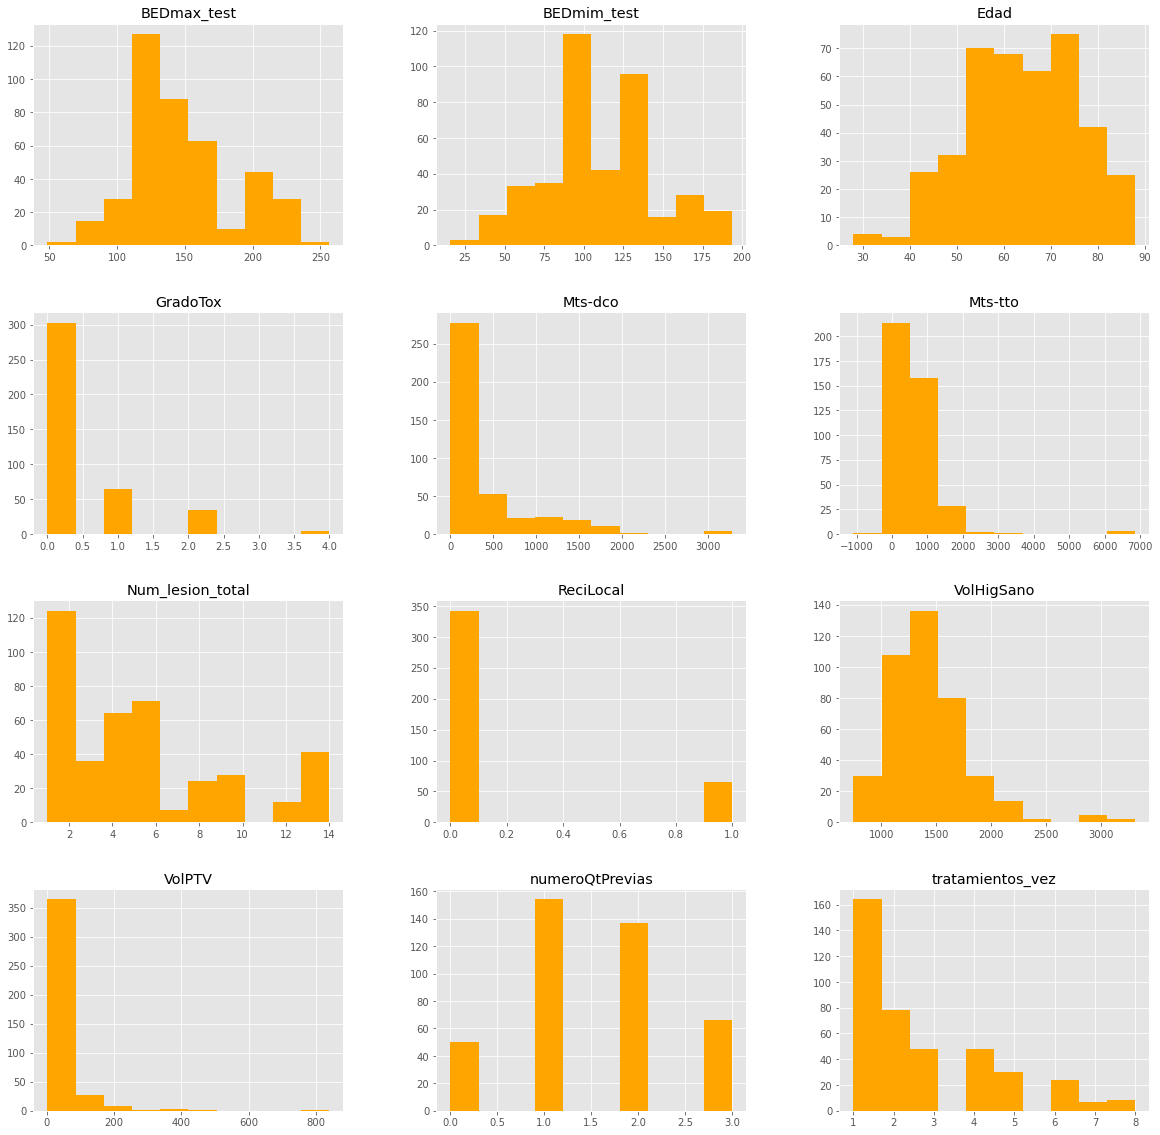

In [32]:
data_Recidiva.hist(figsize = (20,20), color = 'orange')
plt.show()

### **Negative dates**

There are 2 negative dates due to an error in data. The best aprox is to delete them.

In [33]:
data_Recidiva[data_Recidiva['Mts-tto'] < 0]

,Sexo,Edad,Num_lesion_total,tratamientos_vez,tratatos_anteriomente,Mts-tto,Mts-dco,Histología,NeumotoraxHematoma,numeroQtPrevias,TtoLocalPrevio,mtsSNC,mtdOtrosNiveles,VolPTV,BEDmax_test,BEDmim_test,VolHigSano,ControlRespiratorio,Segmento,GradoTox,ReciLocal
235,M,67,1,1,No,-131,58.0,Adenoca Colon/Rectal,No,1,No,No,No,34.56,204.768,170.133,1981.0,Gating,Segmento V,0,0
236,F,63,1,1,No,-1088,1826.0,Adenoca Colon/Rectal,No,2,No,No,Si,14.00,219.375,161.339,901.0,Gating,Segmento V,0,0


In [34]:
data_Recidiva.drop(data_Recidiva[data_Recidiva['Mts-tto'] < 0].index, inplace = True)

In [35]:
data_Recidiva.shape

(405, 21)

### **Vol healthy liver**

In [36]:
data_Recidiva.VolHigSano.describe()

count     405.000
mean     1431.237
std       362.722
min       747.000
25%      1200.000
50%      1384.480
75%      1604.500
max      3307.280
Name: VolHigSano, dtype: float64

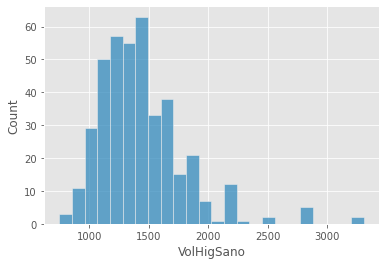

In [37]:
ax= sns.histplot(data=data_Recidiva, x= data_Recidiva.VolHigSano)

### **Vol PTV**

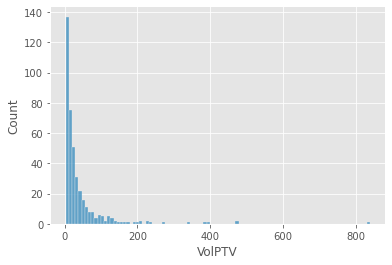

In [38]:
sns.histplot(data=data_Recidiva, x= data_Recidiva.VolPTV[data_Recidiva.VolPTV<1000]);

In [39]:
data_Recidiva.VolPTV.describe()

count    405.000
mean      40.275
std       71.279
min        2.400
25%        9.190
50%       18.910
75%       41.940
max      838.690
Name: VolPTV, dtype: float64

<AxesSubplot:xlabel='ReciLocal', ylabel='VolPTV'>

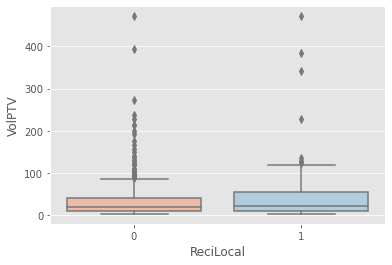

In [40]:
sns.boxplot(x = 'ReciLocal', y= data_Recidiva['VolPTV'][data_Recidiva['VolPTV']< 800], data = data_Recidiva, palette='RdBu')

### **BEDMax**

In [41]:
data_Recidiva.BEDmax_test.describe()

count    405.000
mean     147.086
std       37.567
min       48.533
25%      121.980
50%      138.361
75%      165.538
max      256.533
Name: BEDmax_test, dtype: float64

<AxesSubplot:xlabel='BEDmax_test', ylabel='Count'>

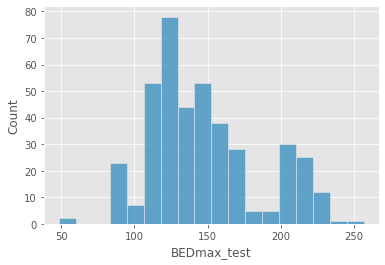

In [42]:
sns.histplot(data=data_Recidiva, x= 'BEDmax_test')

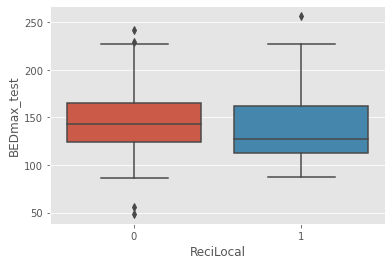

In [43]:
sns.boxplot(x = 'ReciLocal', y= 'BEDmax_test', data = data_Recidiva);


**Very interesting regarding discussion about high radiation use because it seems  that most people who do not have local recurrence have had higher radiation treatments**

### **BEDmin**

In [44]:
data_Recidiva.BEDmim_test.describe()

count    405.000
mean     109.622
std       34.592
min       15.732
25%       91.872
50%      104.633
75%      130.316
max      193.743
Name: BEDmim_test, dtype: float64

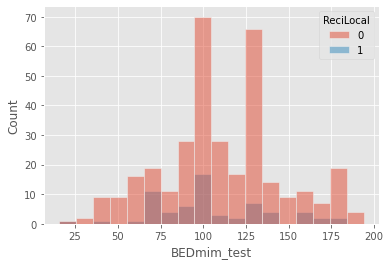

In [45]:
sns.histplot(data=data_Recidiva, x=data_Recidiva.BEDmim_test, hue='ReciLocal');

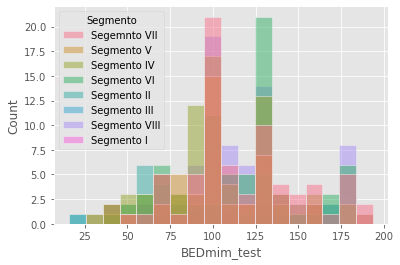

In [46]:
sns.histplot(data=data_Recidiva, x=data_Recidiva.BEDmim_test, hue='Segmento');

**Edad**

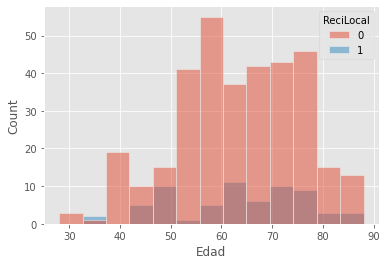

In [47]:
sns.histplot(data=data_Recidiva, x='Edad', hue='ReciLocal');

### Relations

**VolPTV-DMax**

(-10.0, 400.0)

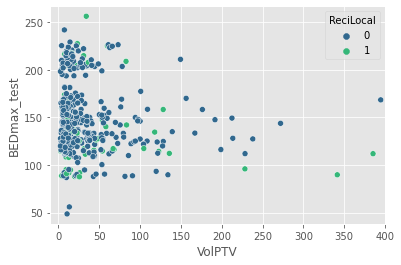

In [48]:
ax = sns.scatterplot(data= data_Recidiva, x='VolPTV', y='BEDmax_test', hue = 'ReciLocal', palette='viridis')
ax.set_xlim([-10,400])
#.set_ylim([0,120])

**Dmin - Dmax**

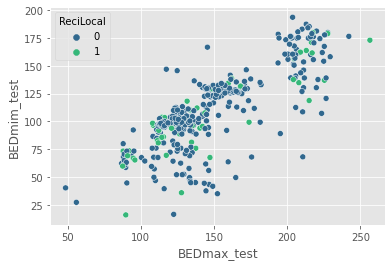

In [49]:
ax= sns.scatterplot(data=data_Recidiva, y='BEDmim_test', x= 'BEDmax_test', palette='viridis', hue="ReciLocal" )
#ax.set_xlim([20,80])
#ax.set_ylim([0,100])

In [50]:
#Mayor Dmax, mayor Dmin, exceptions to linearity

**VolPTV-VolHigsano**

(-5.0, 500.0)

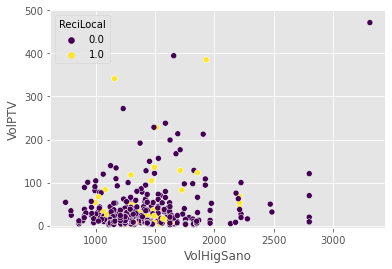

In [51]:
ax= sns.scatterplot(data=data_Recidiva, y='VolPTV', x= data.VolHigSano[data.VolHigSano < 4000], palette='viridis', hue="ReciLocal" )
#ax.set_xlim([20,80])
ax.set_ylim([-5,500])

**DMax-VolHigsano**

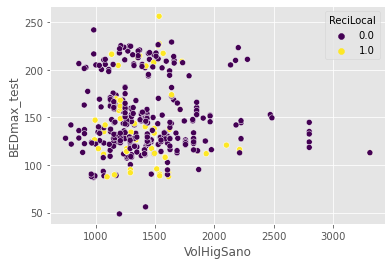

In [52]:
ax= sns.scatterplot(data=data_Recidiva, y='BEDmax_test', x= data.VolHigSano, palette='viridis', hue="ReciLocal" )
#ax.set_xlim([20,80])
#ax.set_ylim([-5,100])

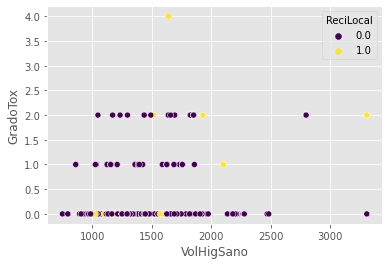

In [53]:
ax= sns.scatterplot(data=data_Recidiva, y='GradoTox', x= data.VolHigSano, palette='viridis', hue="ReciLocal" )

**Toxicity and number of chemicals**

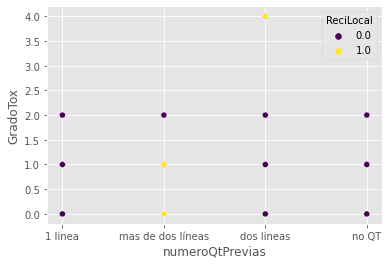

In [54]:
ax= sns.scatterplot(data=data_Recidiva, y='GradoTox', x= data.numeroQtPrevias, palette='viridis', hue="ReciLocal" )

**Segment liver-DMax**

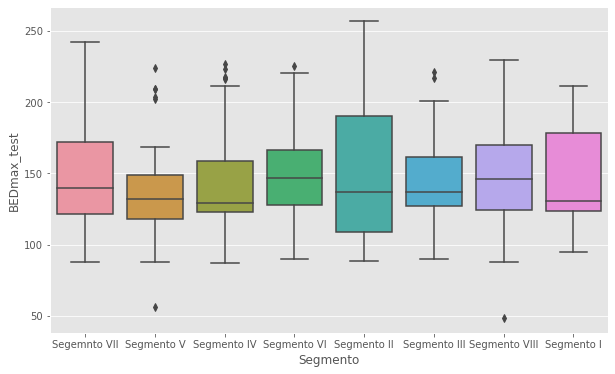

In [55]:
plt.rcParams['figure.figsize']=10,6
sns.boxplot(x = 'Segmento', y= 'BEDmax_test', data = data_Recidiva);

That's makes sense because depending on the segment of the liver in which the lesion is located, there will be different biological organs.

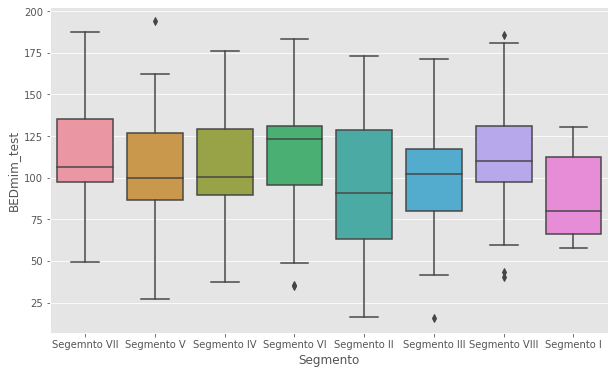

In [56]:
plt.rcParams['figure.figsize']=10,6
sns.boxplot(x = 'Segmento', y= 'BEDmim_test', data = data_Recidiva);

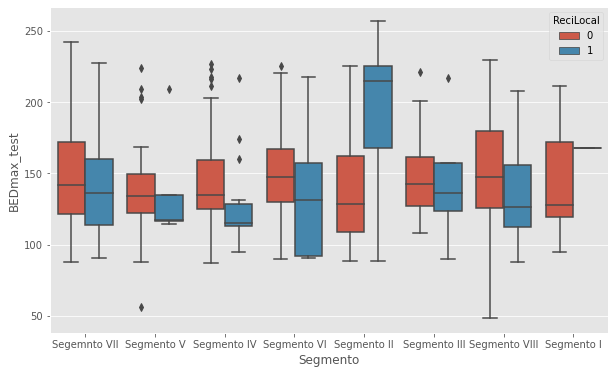

In [57]:
plt.rcParams['figure.figsize']=10,6
sns.boxplot(x = 'Segmento', y= 'BEDmax_test', data = data_Recidiva, hue = 'ReciLocal');

In this case, it is much clearer how those who do not present local recurrence have usually had treatments with more radiation.

As we saw above, patients with higher values of effective biological dose(BED) are more likely to have no local recurrence. If we look at this with respect to the local segment of the liver, we can see that this is also true except for segment II.

A priori there is no cause, it could be due to the fact that out of 30 cases we have of segment II, only 5 have presented local recurrence and therefore it may not be representative.


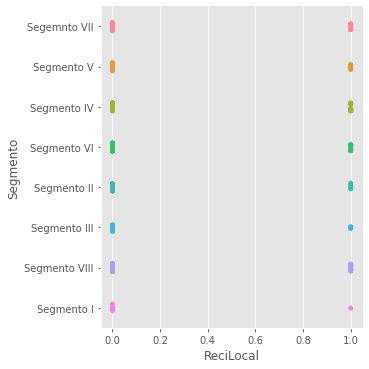

In [58]:
sns.catplot(x="ReciLocal", y="Segmento", data=data_Recidiva)

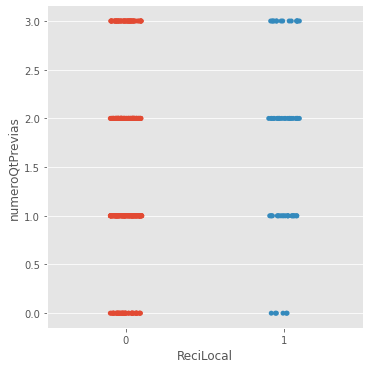

In [59]:
sns.catplot(x="ReciLocal", y='numeroQtPrevias', data=data_Recidiva)

### Conclusion: a priori we do not see any trend between the variables. However, in the next step we will study their correlation.

# 8. Correlation between variables

In [60]:
data_Recidiva.corr()

,Edad,Num_lesion_total,tratamientos_vez,Mts-tto,Mts-dco,numeroQtPrevias,VolPTV,BEDmax_test,BEDmim_test,VolHigSano,GradoTox,ReciLocal
Edad,1.000,-0.207,-0.323,0.029,-0.068,-0.248,0.149,-0.061,-0.045,-0.143,-0.218,-0.002
Num_lesion_total,-0.207,1.000,0.635,-0.044,-0.102,0.077,-0.244,-0.207,-0.159,0.044,0.224,-0.034
tratamientos_vez,-0.323,0.635,1.000,-0.158,-0.014,-0.100,-0.249,-0.179,-0.062,0.216,0.437,-0.089
Mts-tto,0.029,-0.044,-0.158,1.000,0.116,0.108,0.064,-0.149,-0.132,-0.043,-0.058,0.049
Mts-dco,-0.068,-0.102,-0.014,0.116,1.000,0.199,0.120,-0.117,-0.094,0.164,0.073,-0.103
numeroQtPrevias,-0.248,0.077,-0.100,0.108,0.199,1.000,0.008,-0.152,-0.244,0.032,-0.118,0.089
VolPTV,0.149,-0.244,-0.249,0.064,0.120,0.008,1.000,-0.132,-0.161,0.278,0.064,0.150
BEDmax_test,-0.061,-0.207,-0.179,-0.149,-0.117,-0.152,-0.132,1.000,0.786,-0.058,-0.018,-0.071
BEDmim_test,-0.045,-0.159,-0.062,-0.132,-0.094,-0.244,-0.161,0.786,1.000,-0.019,0.037,-0.063
VolHigSano,-0.143,0.044,0.216,-0.043,0.164,0.032,0.278,-0.058,-0.019,1.000,0.285,0.030


<AxesSubplot:>

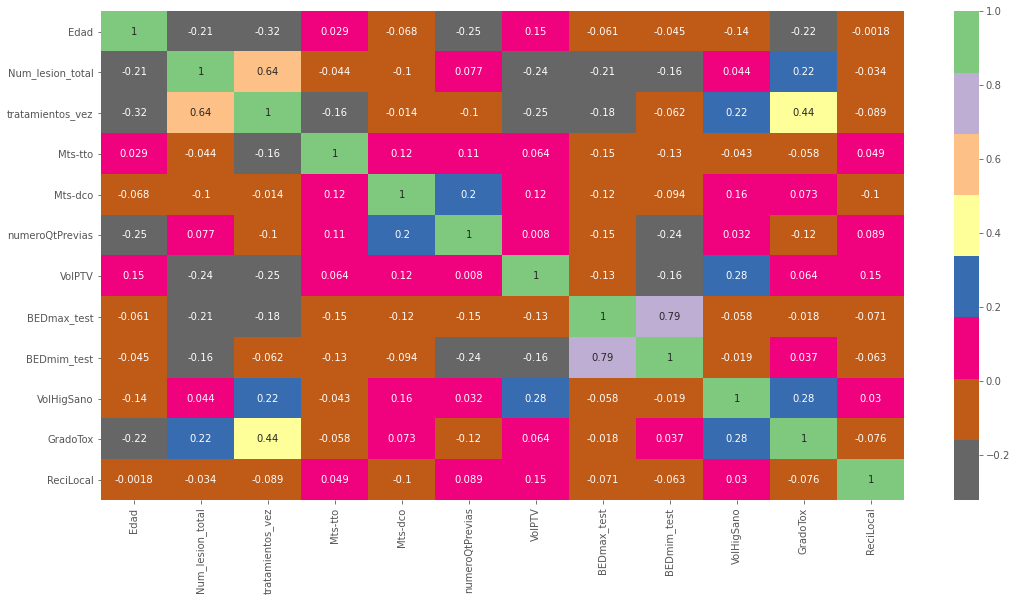

In [61]:
# to see better
plt.figure(figsize=(18,9))
sns.heatmap(data_Recidiva.corr(),annot = True, cmap ="Accent_r")

Although there are several techniques to study the correlation between variables in a first approach to the problem I will only look at the correlation matrix.

We can see that there is no high correlation either directly or inversely proportional between the variables. 
In fact in general the correlations are low especially with respect to our objective. This is going to be a disadvantage in obtaining a good model.

# 9. imbalanced classes

**Before starting with the pre-processing of the data to build a model, we have to take into account that our target is not balanced**

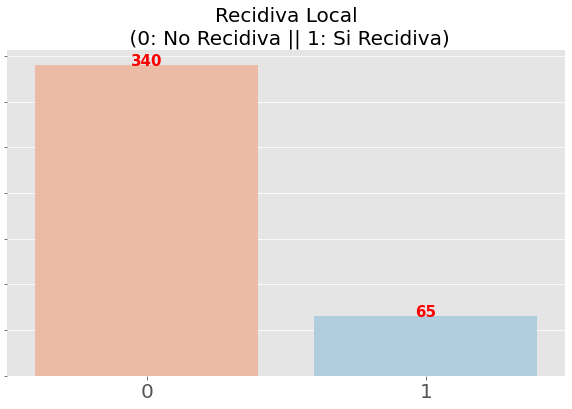

In [62]:
fig, ax = plt.subplots()
g = sns.countplot(data_Recidiva['ReciLocal'], palette='RdBu')

g.set_yticklabels([])
plt.style.use('ggplot')
                  
# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", color='red', fontweight='bold', fontsize= 15) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Recidiva Local\n (0: No Recidiva || 1: Si Recidiva)', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.show()

In [63]:
print('No Recidiva', round(data_Recidiva['ReciLocal'].value_counts()[0]/len(data_Recidiva) * 100,2), '% of the dataset')
print('Recidiva', round(data_Recidiva['ReciLocal'].value_counts()[1]/len(data_Recidiva) * 100,2), '% of the dataset')

No Recidiva 83.95 % of the dataset
Recidiva 16.05 % of the dataset


0    340
1     65
Name: ReciLocal, dtype: int64


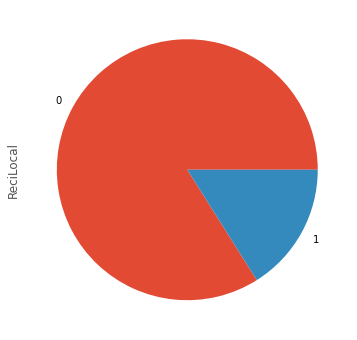

In [64]:
# Diagnosis Pie chart:-
print(data_Recidiva['ReciLocal'].value_counts())
data_Recidiva['ReciLocal'].value_counts().plot.pie();

We also have imbalanced data for toxicity. Our second aim is going to predict toxicity because we want to demostrate that is not related with radiation  but to chemotherapy.

Text(0.5, 1.0, 'Grado de toxicidad')

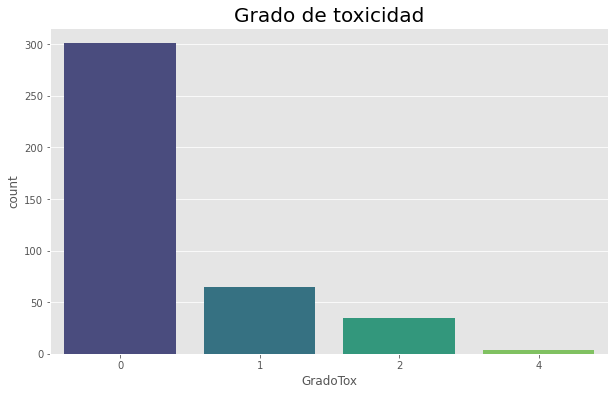

In [65]:
fig, ax = plt.subplots()
g = sns.countplot(data_Recidiva['GradoTox'], palette='viridis')
plt.title('Grado de toxicidad', fontsize=20)

# 10. Save final dataframe

In [66]:
data_Recidiva.head()

,Sexo,Edad,Num_lesion_total,tratamientos_vez,tratatos_anteriomente,Mts-tto,Mts-dco,Histología,NeumotoraxHematoma,numeroQtPrevias,TtoLocalPrevio,mtsSNC,mtdOtrosNiveles,VolPTV,BEDmax_test,BEDmim_test,VolHigSano,ControlRespiratorio,Segmento,GradoTox,ReciLocal
0,M,64,2,1,No,76,617.0,NSCLC,No,1,No,No,No,34.4,204.343,151.568,1405.0,Gating,Segemnto VII,0,0
1,M,64,2,1,Sí,327,617.0,NSCLC,No,1,No,No,No,44.3,203.705,193.743,1405.0,Gating,Segmento V,0,0
2,M,71,2,1,No,2194,500.0,Adenoca Colon/Rectal,No,3,No,No,No,100.0,146.180,88.265,1273.0,Gating,Segmento IV,0,0
3,M,71,2,1,Sí,2241,500.0,Adenoca Colon/Rectal,No,3,No,No,No,109.0,158.645,91.872,1171.0,Gating,Segmento IV,0,0
4,M,74,2,1,No,602,0.0,Adenoca Colon/Rectal,No,2,No,No,No,9.8,90.421,72.207,1538.8,Gating,Segmento VI,0,1


In [67]:
data_Recidiva.to_excel('data_Recidiva.xlsx', index=False)